In [138]:
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [139]:
CHOSEN = 1

In [140]:
new_model = tf.keras.models.load_model('./Models/m90_n90_s150_i100_l1600k/my_model')

In [141]:
train_mean = pd.Series({'Outer Temp.':24.985298,'Initial Inner Temp.':69.970662,'Outer Ws':9.854125,'Inner Temp.':55.485196})
train_std = pd.Series({'Outer Temp.':2.868629,'Initial Inner Temp.':5.775671,'Outer Ws':5.751491,'Inner Temp.':5.213089})


In [142]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [143]:
tf.test.is_built_with_gpu_support()

True

In [144]:
PREV_SIZE = 90
SIZE = 90

In [145]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df, val_df, test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [146]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [147]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [148]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = self.test
  self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [149]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [150]:
#HERE

In [151]:
#new_model = tf.keras.models.load_model('m60_n90_s64_i100_l00k/my_model')
#new_model = tf.keras.models.load_model('double_model_no_random/my_model')
#new_model = tf.keras.models.load_model('model_60_24_con_sep100_800k_90_mae_2/my_model_noreg')

In [152]:
#TEST 1* : 'training_cases_twov_90_escalon_t_int_2.csv'
#TEST 1 'training_cases_twov_90_text_w16.csv'
#TEST 2: 'training_cases_twov_90_text_w5.csv'

In [153]:
#df2 = pd.read_csv('training_cases_twov_90_escalon_t_int_2.csv',header=0, index_col=0, sep = ';')
#df2 = pd.read_csv('training_cases_twov_90_text_w16.csv',header=0, index_col=0, sep = ';')
#df2 = pd.read_csv('training_cases_twov_90_text_w5.csv',header=0, index_col=0, sep = ';')
#df2 = pd.read_csv('training_cases_twov_90_escalon_t_int_4_ctr-10_1.csv',header=0, index_col=0, sep = ';')


In [154]:
df_list = []

In [155]:

df_list.append(pd.read_csv('./Simulations/simulated_data_sep_var_150_800k_novdesv.csv',header=0, index_col=0, sep = ';'))
df_list.append(pd.read_csv('./Simulations/simulated_data_sep_var_150_800k_novdesv_2.csv',header=0, index_col=0, sep = ';'))

In [156]:
chosen_df = CHOSEN -1
df2 = df_list[chosen_df]

In [157]:
#zeros_df = pd.DataFrame(0, index=range(SIZE), columns=df2.columns)
zeros_df = pd.DataFrame(0, index=range(SIZE-2), columns=df2.columns)
df2 = pd.concat([zeros_df,df2],ignore_index=True)

In [158]:
df2['Outer Temp.'] = (df2['Outer Temp.'] - train_mean['Outer Temp.']) / train_std['Outer Temp.']
df2['Outer Ws'] = (df2['Outer Ws'] - train_mean['Outer Ws']) / train_std['Outer Ws']
df2['Initial Inner Temp.'] = (df2['Initial Inner Temp.'] - train_mean['Initial Inner Temp.']) / train_std['Initial Inner Temp.']
df2['Inner Temp.'] = (df2['Inner Temp.'] - train_mean['Inner Temp.']) / train_std['Inner Temp.']


In [159]:
dataset = df2[0:200000]

In [160]:
def make_dataset(data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=PREV_SIZE,
      sequence_stride=1,
      shuffle=False,
      batch_size=1000)

  return ds

ds = make_dataset(dataset)

ds

<BatchDataset element_spec=TensorSpec(shape=(None, None, 4), dtype=tf.float32, name=None)>

In [161]:
array = new_model.predict(ds)
array = array [:,:,0]

200/200 [==============================] - 3s 11ms/step


In [162]:
df = pd.DataFrame(array)
df

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,-2.624168,-2.511954,-2.403948,-2.308000,-2.231571,-2.165093,-2.117547,-2.095109,-2.081761,-2.086847,...,-0.709675,-0.715486,-0.722836,-0.705271,-0.717395,-0.698477,-0.690632,-0.701096,-0.690672,-0.686543
1,-1.900599,-1.737942,-1.583404,-1.457225,-1.359332,-1.277851,-1.224114,-1.200964,-1.192307,-1.206451,...,-0.637000,-0.646395,-0.649772,-0.636268,-0.649407,-0.628984,-0.623241,-0.632380,-0.619171,-0.613637
2,-1.332289,-1.166522,-1.008938,-0.890278,-0.804060,-0.733270,-0.694567,-0.682130,-0.684839,-0.710295,...,-0.612889,-0.622108,-0.622174,-0.612368,-0.624093,-0.604710,-0.600514,-0.607066,-0.593736,-0.586606
3,-1.057530,-0.903420,-0.756952,-0.654224,-0.584492,-0.528351,-0.505794,-0.505119,-0.519046,-0.553945,...,-0.558704,-0.569174,-0.568070,-0.562622,-0.573859,-0.558100,-0.556058,-0.561105,-0.551004,-0.545195
4,-0.883476,-0.751032,-0.625833,-0.543549,-0.491707,-0.450064,-0.440811,-0.449071,-0.470427,-0.510723,...,-0.490698,-0.502444,-0.501648,-0.501088,-0.512827,-0.501499,-0.501732,-0.506855,-0.501349,-0.498517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199906,-0.988562,-0.986976,-0.988371,-0.985047,-0.986969,-0.985505,-0.984167,-0.983697,-0.983229,-0.983349,...,-0.986911,-0.986298,-0.986252,-0.986079,-0.989398,-0.986959,-0.986236,-0.986223,-0.985985,-0.986042
199907,-0.990888,-0.989353,-0.990794,-0.987513,-0.989484,-0.988053,-0.986745,-0.986273,-0.985805,-0.985907,...,-0.985660,-0.985036,-0.984976,-0.984785,-0.988076,-0.985618,-0.984875,-0.984853,-0.984602,-0.984657
199908,-0.988556,-0.986925,-0.988281,-0.984946,-0.986857,-0.985380,-0.984032,-0.983545,-0.983056,-0.983143,...,-0.982688,-0.982060,-0.981990,-0.981795,-0.985085,-0.982623,-0.981887,-0.981856,-0.981603,-0.981646
199909,-0.987188,-0.985531,-0.986854,-0.983499,-0.985391,-0.983904,-0.982547,-0.982063,-0.981583,-0.981676,...,-0.982798,-0.982161,-0.982088,-0.981883,-0.985182,-0.982715,-0.981978,-0.981940,-0.981687,-0.981728


In [163]:
data29 = df[SIZE-1]
data15 = df[int((SIZE/2)-1)]
new_column = ((data29.index) * 1)+PREV_SIZE + SIZE
new_column15 = ((data15.index) * 1)+PREV_SIZE + int(SIZE/2)

In [164]:
dataf = pd.DataFrame({'Time': new_column,'Value': data29})
dataf2 = pd.DataFrame({'Time': new_column15,'Value': data15})
#dataf = dataf.set_index('Time')
#dataf

In [165]:
df2 = df2.drop(columns=['Outer Temp.','Initial Inner Temp.','Outer Ws'])

In [166]:
df2

,Inner Temp.
0,-10.643439
1,-10.643439
2,-10.643439
3,-10.643439
4,-10.643439
...,...
800083,-0.888132
800084,-0.893069
800085,-0.892737
800086,-0.887961


In [167]:
dataf = dataf.set_index('Time')
dataf2 = dataf2.set_index('Time')

In [168]:
#plt.plot(dataf,'b')
#plt.plot(dataf2,'g')
#plt.plot(df2,'r')
#plt.xlim(50,300)
#plt.ylim(-1,1)

In [169]:
#df2 = df2[SIZE + PREV_SIZE:SIZE + PREV_SIZE+100]

In [170]:
dataf[:PREV_SIZE+SIZE]

,Value
Time,
180,-0.686543
181,-0.613637
182,-0.586606
183,-0.545195
184,-0.498517
...,...
355,-0.246074
356,-0.246784
357,-0.248150


In [171]:
loss_array = tf.losses.MAE(df2['Inner Temp.'][SIZE + PREV_SIZE:SIZE + PREV_SIZE+100],dataf['Value'][:100]).numpy()
loss_array_2 = tf.losses.MAE(df2['Inner Temp.'][SIZE + PREV_SIZE:SIZE + PREV_SIZE+100],dataf2['Value'][int(SIZE/2):int(100+SIZE/2)]).numpy()

In [172]:
print(np.average(loss_array), np.average(loss_array_2))

0.0315472 0.004650074


In [173]:
predictions = df.iloc[SIZE]

In [174]:
times = (predictions.index)+PREV_SIZE + SIZE
predicted = pd.DataFrame({'Time':times,'Inner Temp.':predictions})
predicted = predicted.set_index('Time')

In [175]:
real = df2[SIZE+PREV_SIZE:2*SIZE+PREV_SIZE]

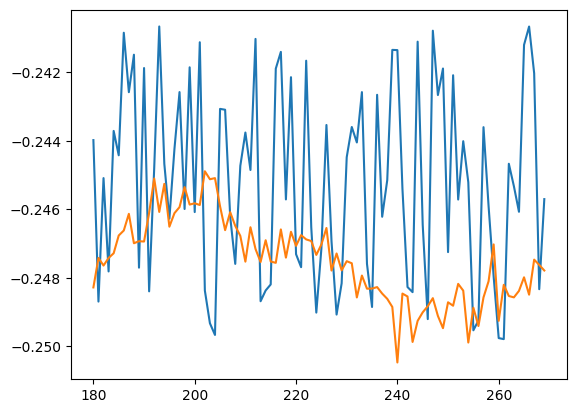

In [176]:
plt.plot(real)
plt.plot(predicted)

In [177]:
mae = np.absolute(np.subtract(real['Inner Temp.'], predicted['Inner Temp.'])).mean()
mae

0.003042383722835211